mean +- standard error of mean of pollutants on day without fire, with fire and up to 5 days after fire outbreak


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Portugal'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000    

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Portugal):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Portugal):
                Label  PM10 Mean (µg/m³)  PM10 SEM (µg/m³)  PM2.5 Mean (µg/m³)  PM2.5 SEM (µg/m³)  NO2 Mean (µg/m³)  NO2 SEM (µg/m³)  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)
              No fire          14.975214          0.189101           10.125003           0.136590          5.467391         0.035301       167.122080        0.887619         0.567226        0.014298
Day 0 (Fire outbreak)          77.914743         22.711822           56.326804          16.821955          9.631521         1.837396       442.551759      145.125295         4.871394        3.016974
                Day 1         253.157224         67.994293          183.724228          49.943150         21.747901         5.069726      1297.863785      413.731124        20.760804        9.006008
                Day 2         320.345651        110.455630          232.425154          80.258566         25.525583         6.142

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Italy'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Italy):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Italy):
                Label  PM10 Mean (µg/m³)  PM10 SEM (µg/m³)  PM2.5 Mean (µg/m³)  PM2.5 SEM (µg/m³)  NO2 Mean (µg/m³)  NO2 SEM (µg/m³)  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)
              No fire          20.962261          0.147429           14.772071           0.106878          9.572475         0.055394       225.105777        0.894287         2.182071        0.038541
Day 0 (Fire outbreak)          33.034077          5.472285           23.560747           3.958647         10.237544         1.051912       256.914506       23.735798         1.702287        0.497928
                Day 1          60.472820         18.889918           43.547131          13.666815         11.412789         2.131811       361.699457       78.887013         1.375705        0.635611
                Day 2          79.327604         24.315848           57.062826          17.472504         13.521723         2.443364

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Spain'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Spain):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Spain):
                Label  PM10 Mean (µg/m³)  PM10 SEM (µg/m³)  PM2.5 Mean (µg/m³)  PM2.5 SEM (µg/m³)  NO2 Mean (µg/m³)  NO2 SEM (µg/m³)  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)
              No fire          15.176686          0.126932           10.568329           0.092840          6.709964         0.041898       179.158697        0.647490         1.057721        0.023065
Day 0 (Fire outbreak)          40.711838          8.005707           29.214726           5.812090          8.644896         0.945576       271.462476       36.106981         2.079028        0.721193
                Day 1          86.891176         25.835697           62.799643          18.798503         12.219799         2.017801       491.253164      121.118968         5.379911        2.496372
                Day 2         103.532211         26.324823           74.712319          19.084316         14.132331         2.094790

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Greece'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Greece):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Greece):
                Label  PM10 Mean (µg/m³)  PM10 SEM (µg/m³)  PM2.5 Mean (µg/m³)  PM2.5 SEM (µg/m³)  NO2 Mean (µg/m³)  NO2 SEM (µg/m³)  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)
              No fire          17.279642          0.164462           12.281477           0.119697          4.248558         0.030307       180.710633        0.574819         0.504087        0.009901
Day 0 (Fire outbreak)          49.922078         16.963102           36.005690          12.311003          6.682817         1.437445       285.777262       56.387553         1.213685        0.592351
                Day 1         130.402791         44.443073           95.338808          32.630601         15.446270         4.688545       788.389719      262.295932         8.841520        4.569368
                Day 2         216.313383         69.033035          158.646532          51.366378         26.546594         7.55826

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Iberia.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Iberia.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Iberia.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Iberia.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Iberia.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Iberia'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000    

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Iberia):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Iberia):
                Label  PM10 Mean (µg/m³)  PM10 SEM (µg/m³)  PM2.5 Mean (µg/m³)  PM2.5 SEM (µg/m³)  NO2 Mean (µg/m³)  NO2 SEM (µg/m³)  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)
              No fire          15.144235          0.136946           10.496921           0.099887          6.509818         0.040835       177.219913        0.686169         0.978715        0.021653
Day 0 (Fire outbreak)          46.612989         10.338401           33.515263           7.558483          8.801395         1.087037       298.600776       53.399541         2.521955        1.085351
                Day 1         116.480896         33.338498           84.320120          24.341194         13.915478         2.560940       634.802512      173.194013         8.117188        3.654867
                Day 2         145.768595         42.713941          105.435598          31.001378         16.351796         2.88324

Divide daily concentrations of pollutants into quartiles Q1 (lowest), Q2, Q3 and Q4 (highest) for days when fires occurred and days they did not - Assess the impact of fire events on the concentration of air pollutants. Calculation of percentage of days (non-wildfire and wildfire) in each of the four qaurtiles

Splits pollutant concentrations into quartiles (25% intervals) separately for fire and no-fire cases:

Q1 = lowest 25%

Q2 = 25–50%

Q3 = 50–75%

Q4 = highest 25%

CO IS NOW IN THE SAME UNITS AS THE OTHER POLLUTANTS

PORTUGAL

In [5]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Portugal"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  91.644255  179.263970  256.983399  443.331299  22727.492823
1     PM2.5   1.352389   12.026590   23.557680   52.621903   1220.058123
2      PM10   1.983242   17.177307   33.051921   72.904765   1599.670734
3       NO2   1.559928    6.063211    9.676672   14.416012    223.099955
4        NO   0.044231    0.240024    0.643124    3.751518    524.911222

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut          max
0        CO  81.042064  133.885311  157.775089  187.245356  1217.575396
1     PM2.5   1.496552    5.983395    8.198538   11.681363   144.903085
2      PM10   2.187659    9.050914   12.503760   17.418560   201.735123
3       NO2   1.266539    3.736012    5.062179    6.741346    23.830735
4        NO   0.012126    0.165384    0.288360    0.612300    16.617527

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with most fire days at latitude=41.250, longitude=-8.250


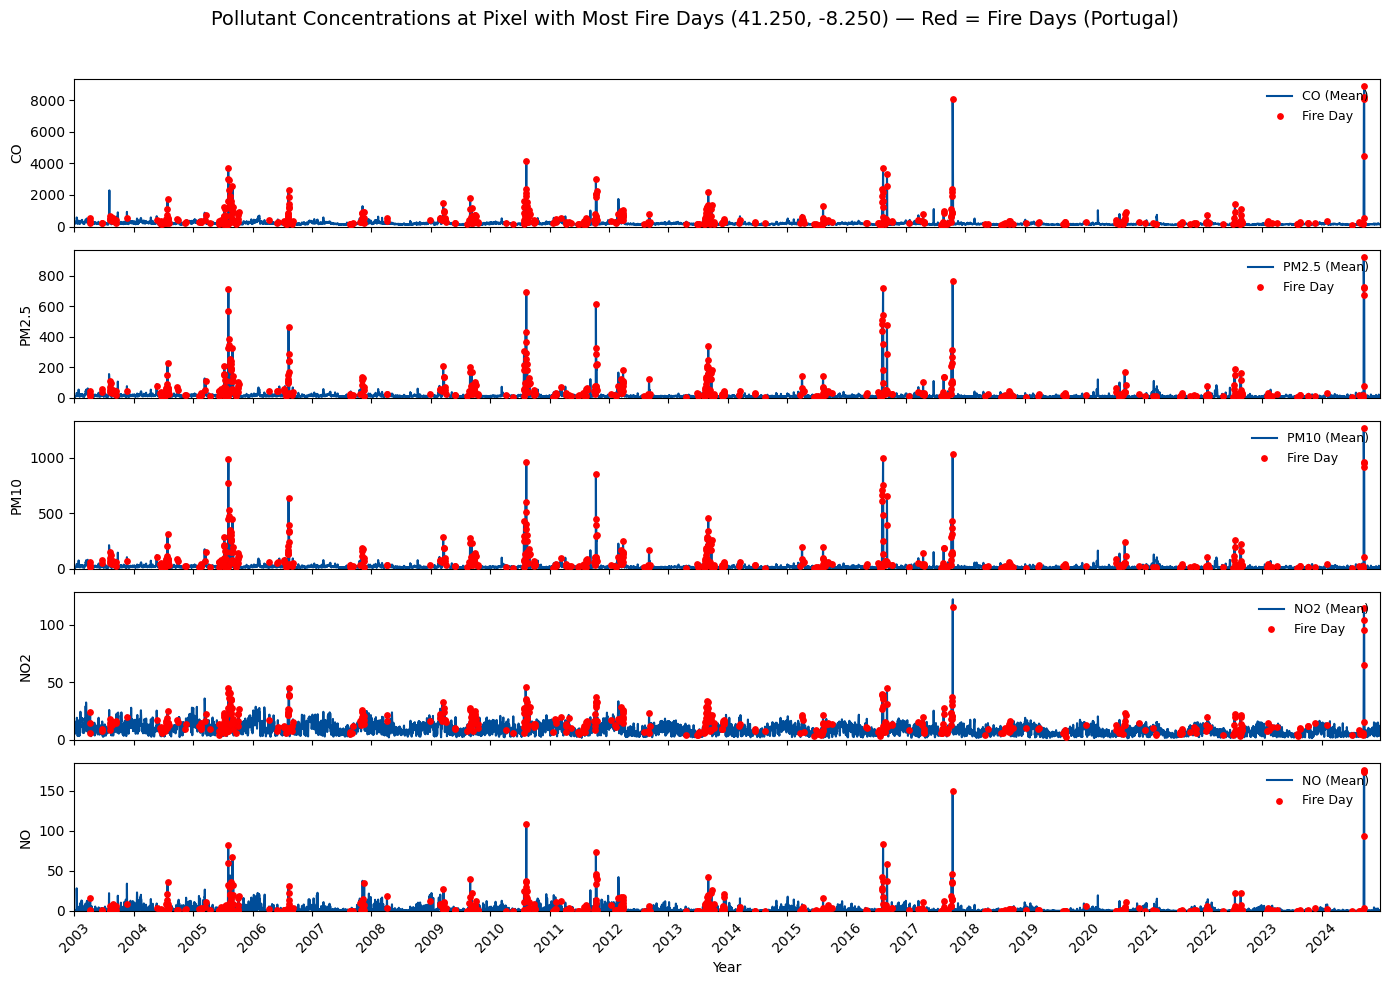

In [6]:
#Plots the pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=-7.500


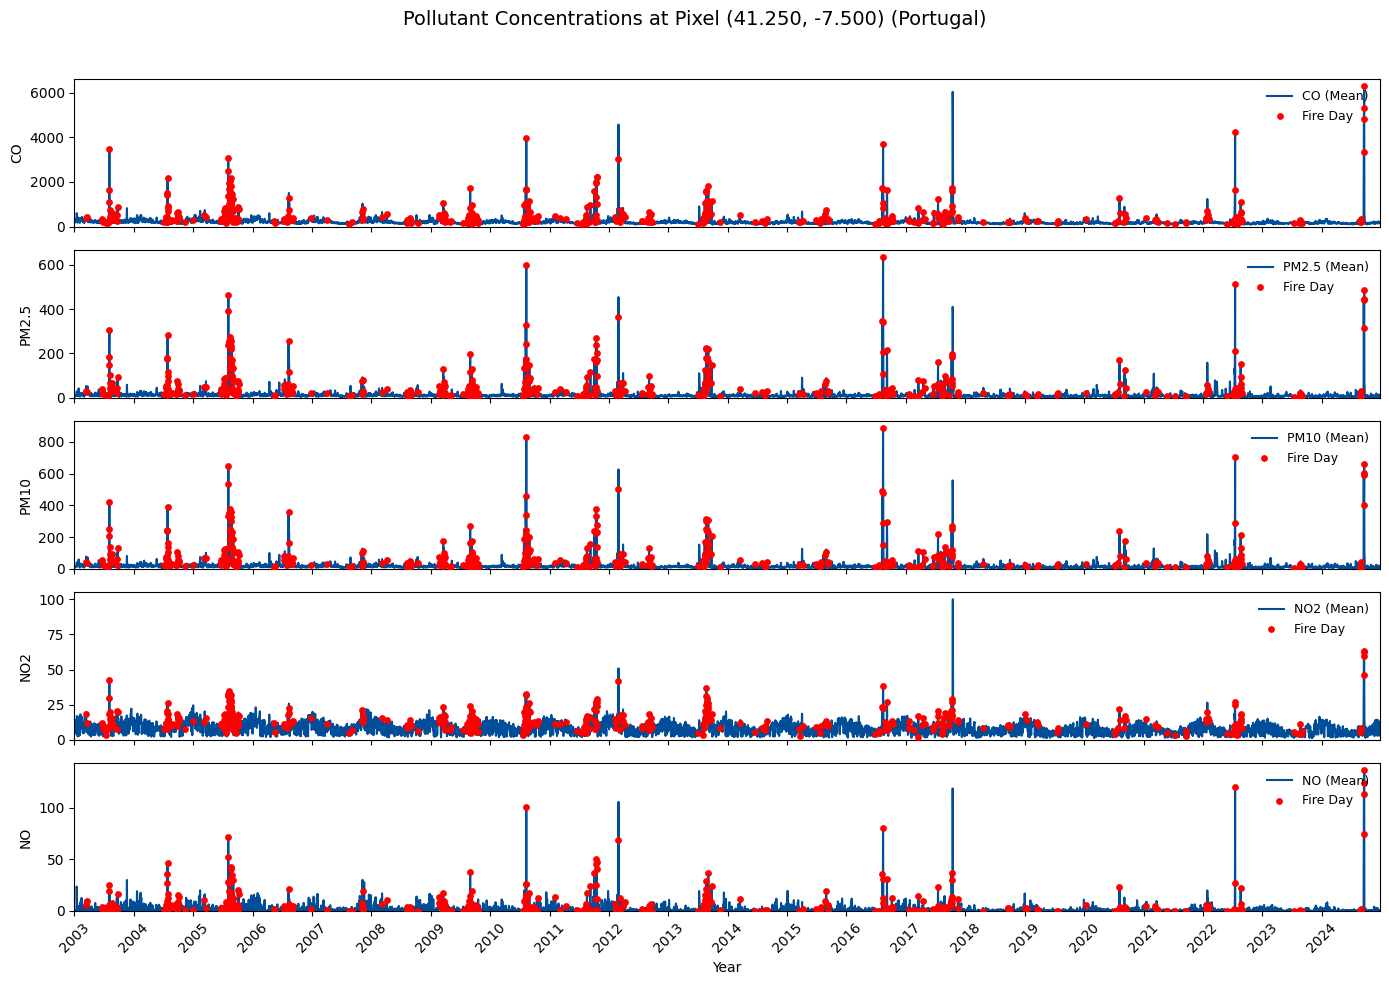

In [7]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25   # Example latitude
lon_val = -7.50  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Total grid pixels: 2795
Pixels with at least one fire: 23

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 41.250, Lon = -8.250, Fire Days = 490
2. Lat = 41.250, Lon = -7.500, Fire Days = 433
3. Lat = 40.500, Lon = -7.500, Fire Days = 390
4. Lat = 40.500, Lon = -8.250, Fire Days = 242
5. Lat = 39.750, Lon = -8.250, Fire Days = 234
6. Lat = 41.250, Lon = -6.750, Fire Days = 184
7. Lat = 39.750, Lon = -7.500, Fire Days = 125

Latitude range:
  min: 35.2500, max: 42.7500
Longitude range:
  min: -11.2500, max: -5.2500
Latitude indices: 1 to 11
Longitude indices: 1 to 9


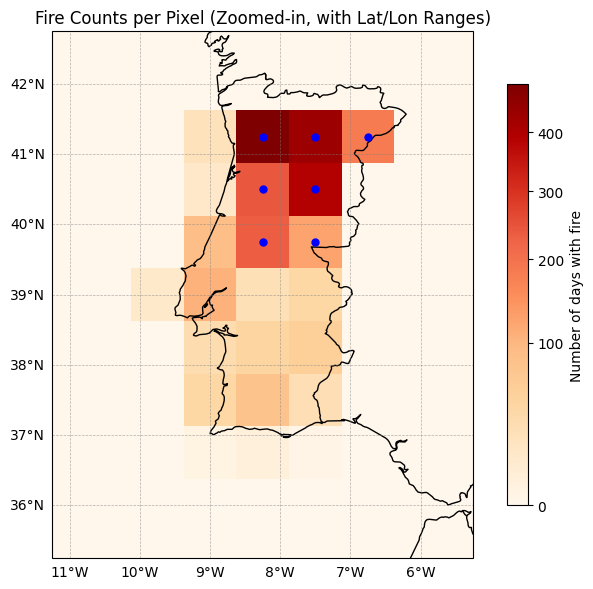

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Portugal.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Portugal"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"\nTotal grid pixels: {total_pixels}")
print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Lat/Lon Ranges)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


ITALY

In [9]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Italy"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  108.653160  168.109410  202.055186  257.634456  2674.026007
1     PM2.5    0.174466   10.460595   15.796014   24.645597   385.148526
2      PM10    0.252130   14.848375   22.352234   34.666647   530.599974
3       NO2    0.240176    4.690520    7.859783   11.823174    68.855573
4        NO    0.000000    0.175388    0.362758    0.960444    77.868684

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  118.462302  176.200429  208.268153  259.476036  571.495006
1     PM2.5    3.509969   10.406545   13.460211   17.723140   65.447931
2      PM10    5.261541   14.965529   19.163456   25.119089   84.677088
3       NO2    2.666766    7.055484    9.030627   11.632593   24.449468
4        NO    0.075712    0.581972    1.220385    2.842791   24.942879

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with most fire days at latitude=37.500, longitude=14.250


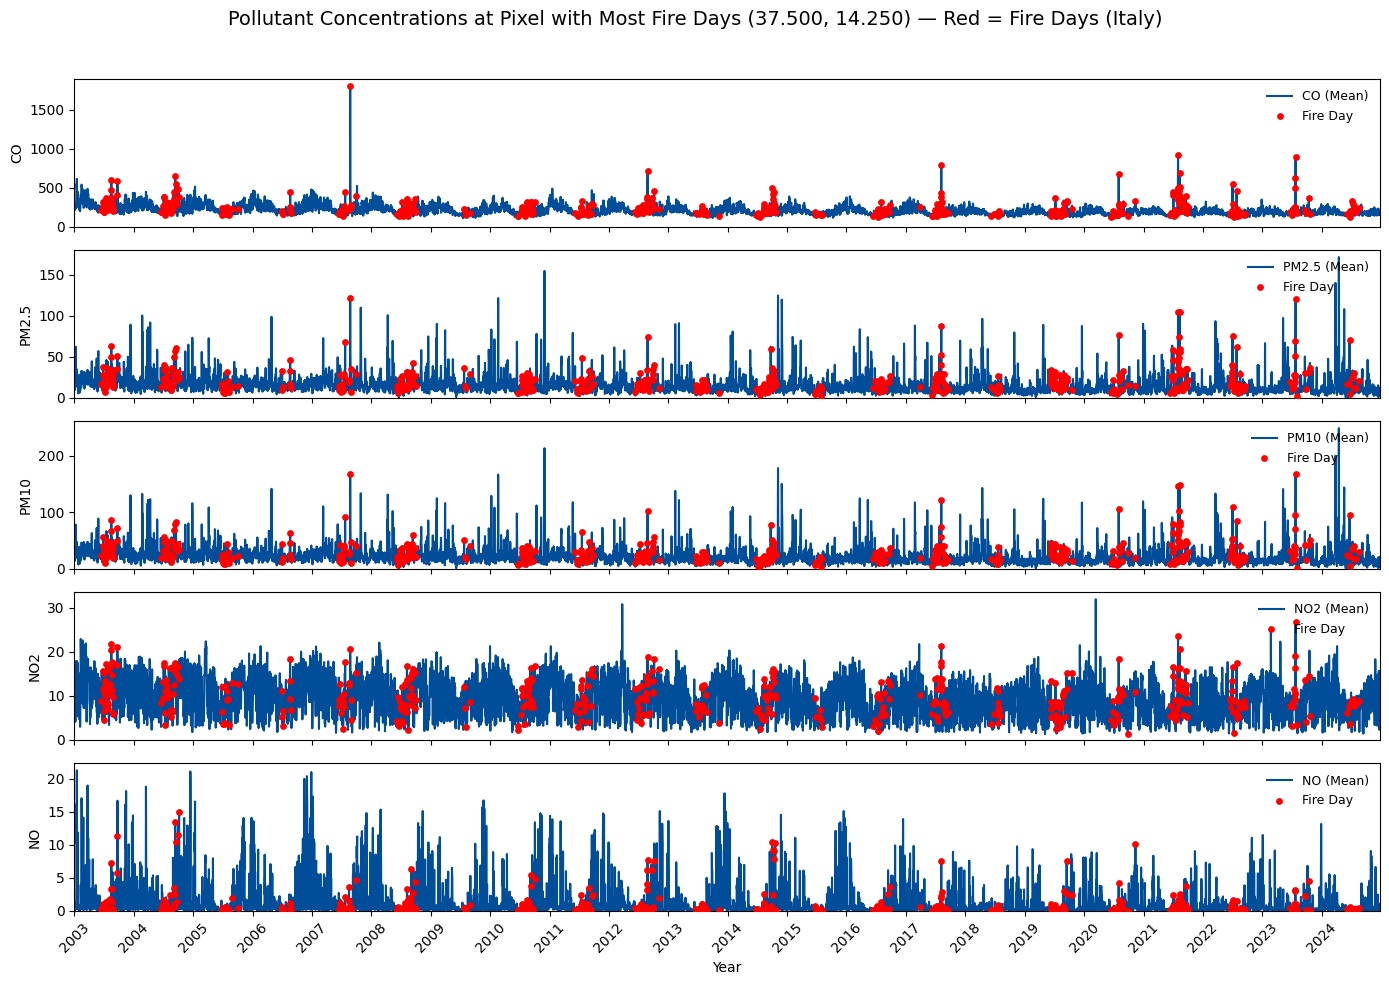

In [10]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Italy"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Italy"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Italy)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=15.000


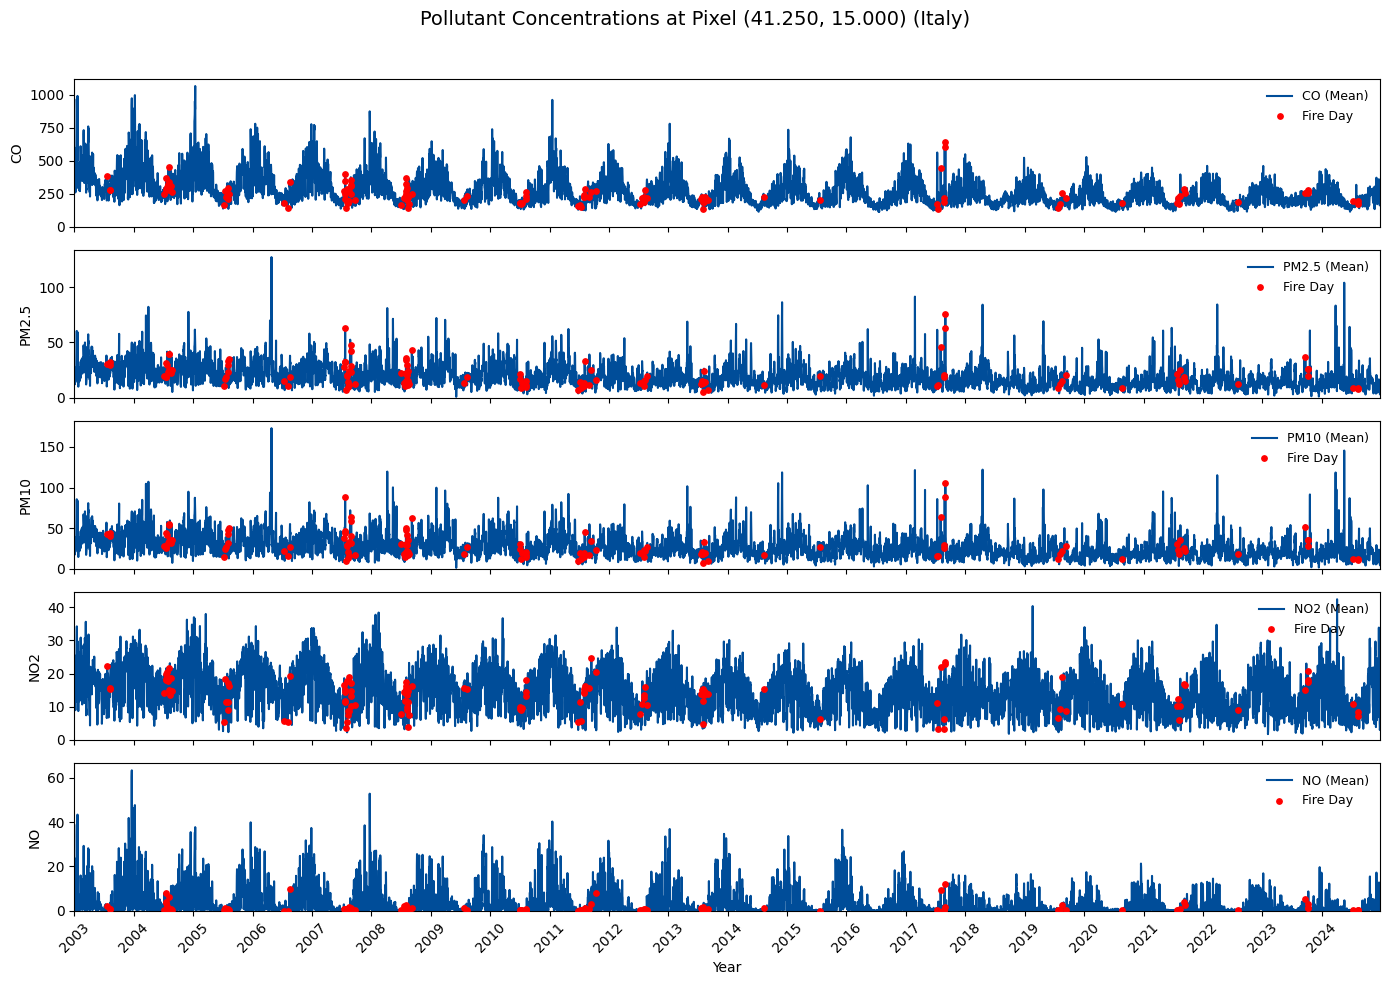

In [11]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Italy"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25  # Example latitude
lon_val = 15.00  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Italy"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Italy)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Total grid pixels: 2795
Pixels with at least one fire: 106

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 37.500, Lon = 14.250, Fire Days = 431
2. Lat = 41.250, Lon = 15.750, Fire Days = 388
3. Lat = 37.500, Lon = 13.500, Fire Days = 358
4. Lat = 37.500, Lon = 15.000, Fire Days = 190
5. Lat = 37.500, Lon = 12.750, Fire Days = 186
6. Lat = 39.750, Lon = 9.000, Fire Days = 170
7. Lat = 39.750, Lon = 16.500, Fire Days = 161

Latitude range:
  min: 34.5000, max: 48.0000
Longitude range:
  min: 5.2500, max: 20.2500
Latitude indices: 0 to 18
Longitude indices: 23 to 43


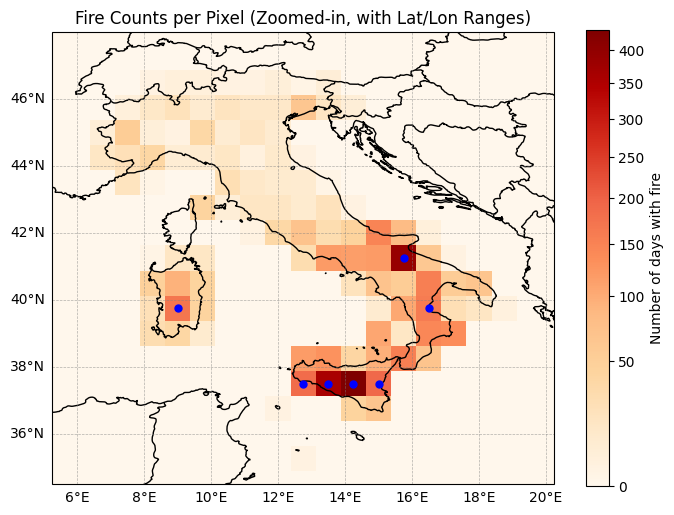

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Italy.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Italy"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"\nTotal grid pixels: {total_pixels}")
print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Lat/Lon Ranges)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


GREECE

In [13]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Greece"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  108.779701  176.395162  217.710885  279.653301  6909.419060
1     PM2.5    0.620074   11.684918   17.340138   25.897886   964.681885
2      PM10    1.564732   16.363317   24.127115   35.981828  1323.984375
3       NO2    0.270646    4.354762    7.728686   13.048683   103.059570
4        NO    0.014067    0.132917    0.307975    1.405706   154.320679

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  108.212757  155.304605  173.889735  199.488342  641.630723
1     PM2.5    0.788244    7.993410   10.742489   14.270189  136.456497
2      PM10    1.143472   11.456279   15.227724   20.119761  190.624863
3       NO2    1.134361    3.027020    3.887361    5.076933   14.865463
4        NO    0.040150    0.150286    0.298681    0.628515    6.394746

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with most fire days at latitude=41.250, longitude=21.750


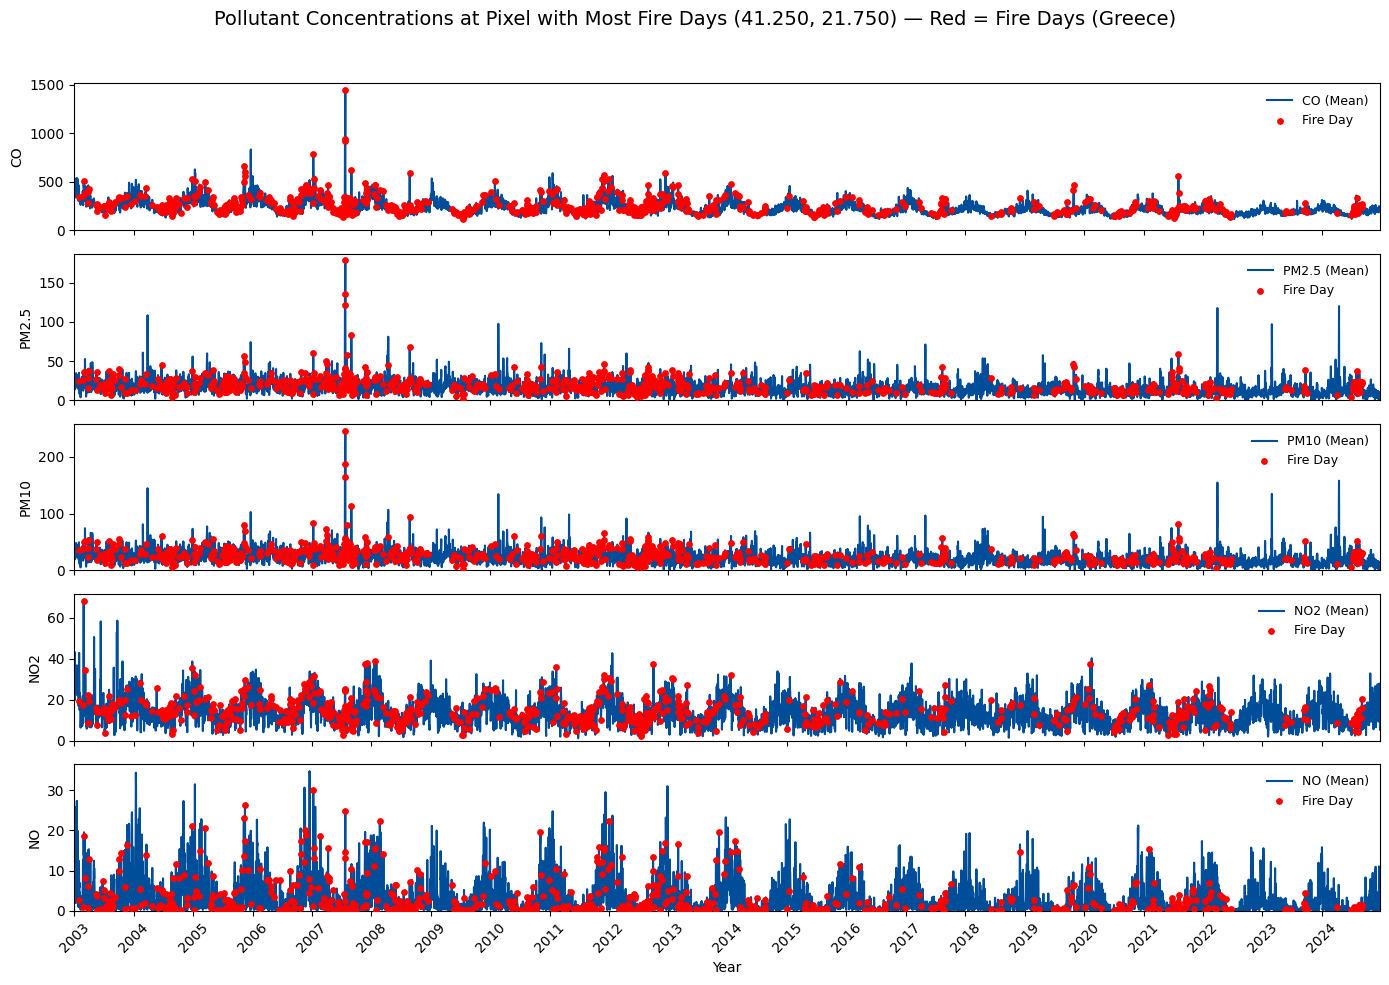

In [14]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Greece"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Greece"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Greece)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=39.000, longitude=21.750


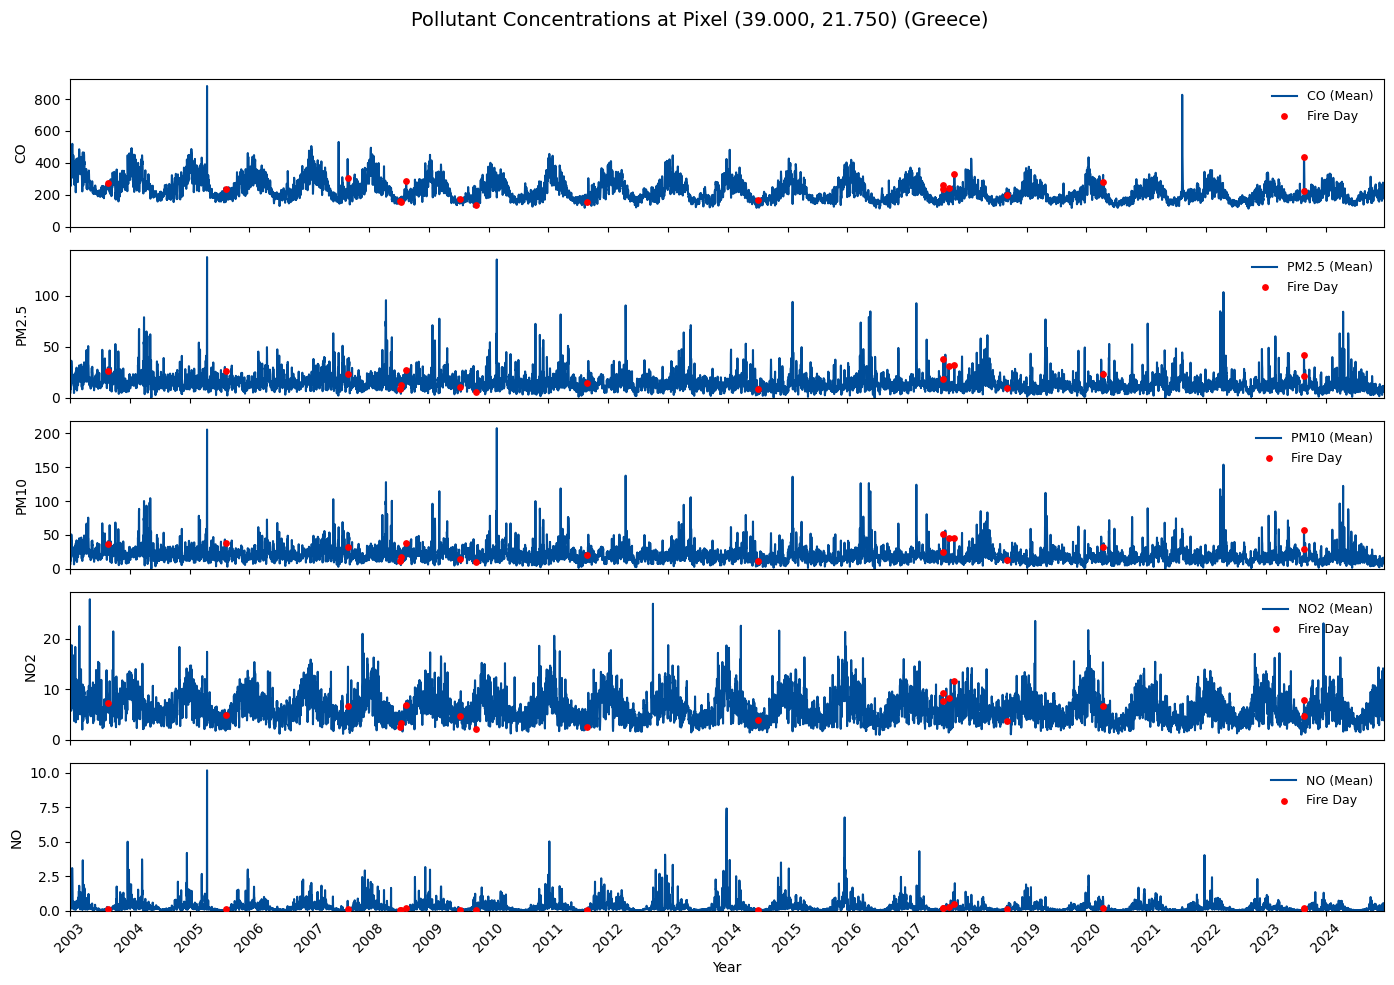

In [15]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Greece"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 39.00 # Example latitude
lon_val = 21.75  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Greece"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Greece)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Total grid pixels: 2795
Pixels with at least one fire: 77

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 41.250, Lon = 21.750, Fire Days = 709
2. Lat = 39.750, Lon = 22.500, Fire Days = 235
3. Lat = 39.750, Lon = 20.250, Fire Days = 200
4. Lat = 42.000, Lon = 26.250, Fire Days = 135
5. Lat = 39.000, Lon = 22.500, Fire Days = 135
6. Lat = 38.250, Lon = 24.000, Fire Days = 117
7. Lat = 38.250, Lon = 23.250, Fire Days = 112

Latitude range:
  min: 34.5000, max: 43.5000
Longitude range:
  min: 18.0000, max: 31.5000
Latitude indices: 0 to 12
Longitude indices: 40 to 58


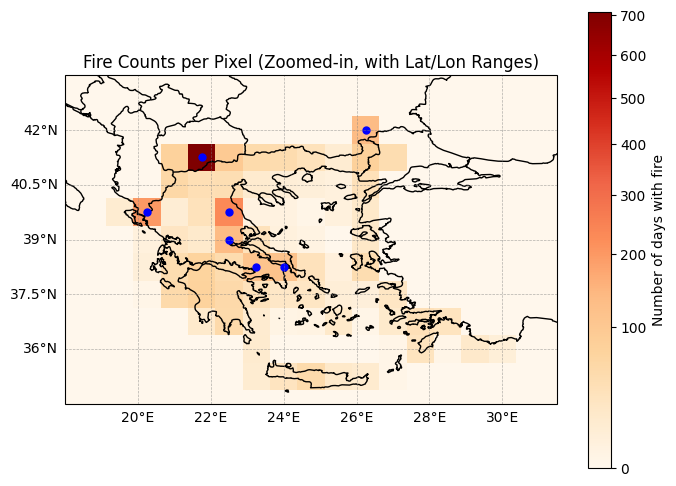

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Greece.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Greece"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"\nTotal grid pixels: {total_pixels}")
print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Lat/Lon Ranges)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


SPAIN

In [17]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Spain"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  92.890624  169.249840  223.783990  334.201003  11997.523964
1     PM2.5   1.506768   10.470768   17.402518   32.140102    699.573324
2      PM10   2.293276   14.812331   24.284245   44.908543    952.068279
3       NO2   0.285172    5.697790    8.963874   13.304694     91.452059
4        NO   0.032021    0.257126    0.647367    2.692297    320.346673

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut         max
0        CO  97.030085  146.429969  169.595191  202.021182  431.066861
1     PM2.5   2.245757    7.119616    9.288455   12.405938   73.506646
2      PM10   3.429071   10.507059   13.557231   17.713981   92.609943
3       NO2   1.797235    4.622228    6.079330    8.351854   19.760695
4        NO   0.055706    0.261702    0.510479    1.192102   11.444273

Fire days counts & percentages:
   quartile  count pollutant  percentage
0 

Selected pixel with most fire days at latitude=42.000, longitude=-8.250


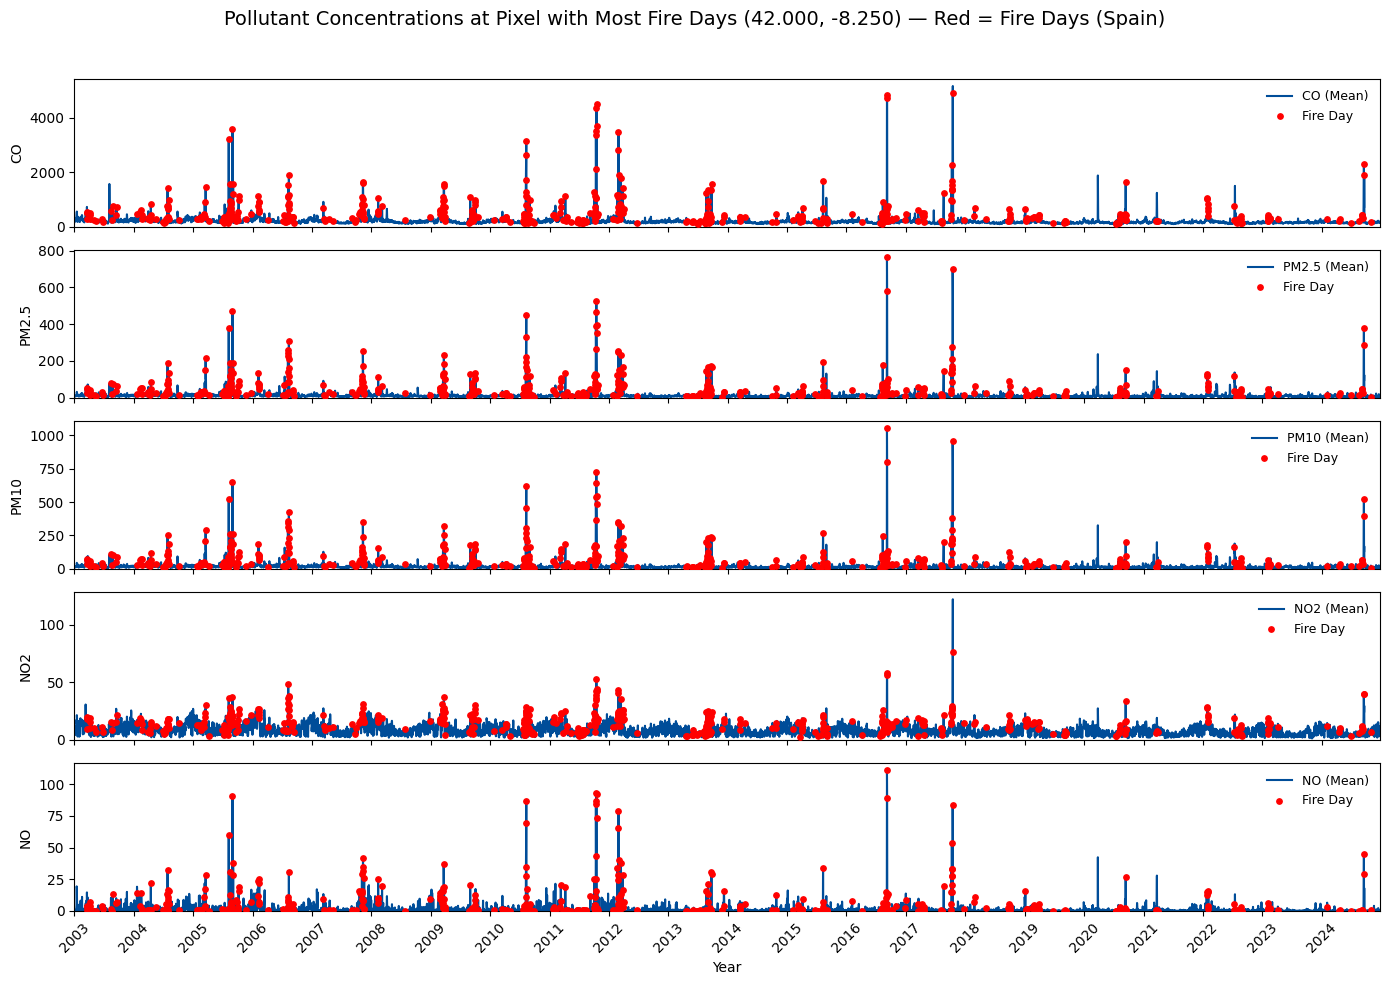

In [18]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Spain"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Spain"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Spain)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=42.000, longitude=-8.250


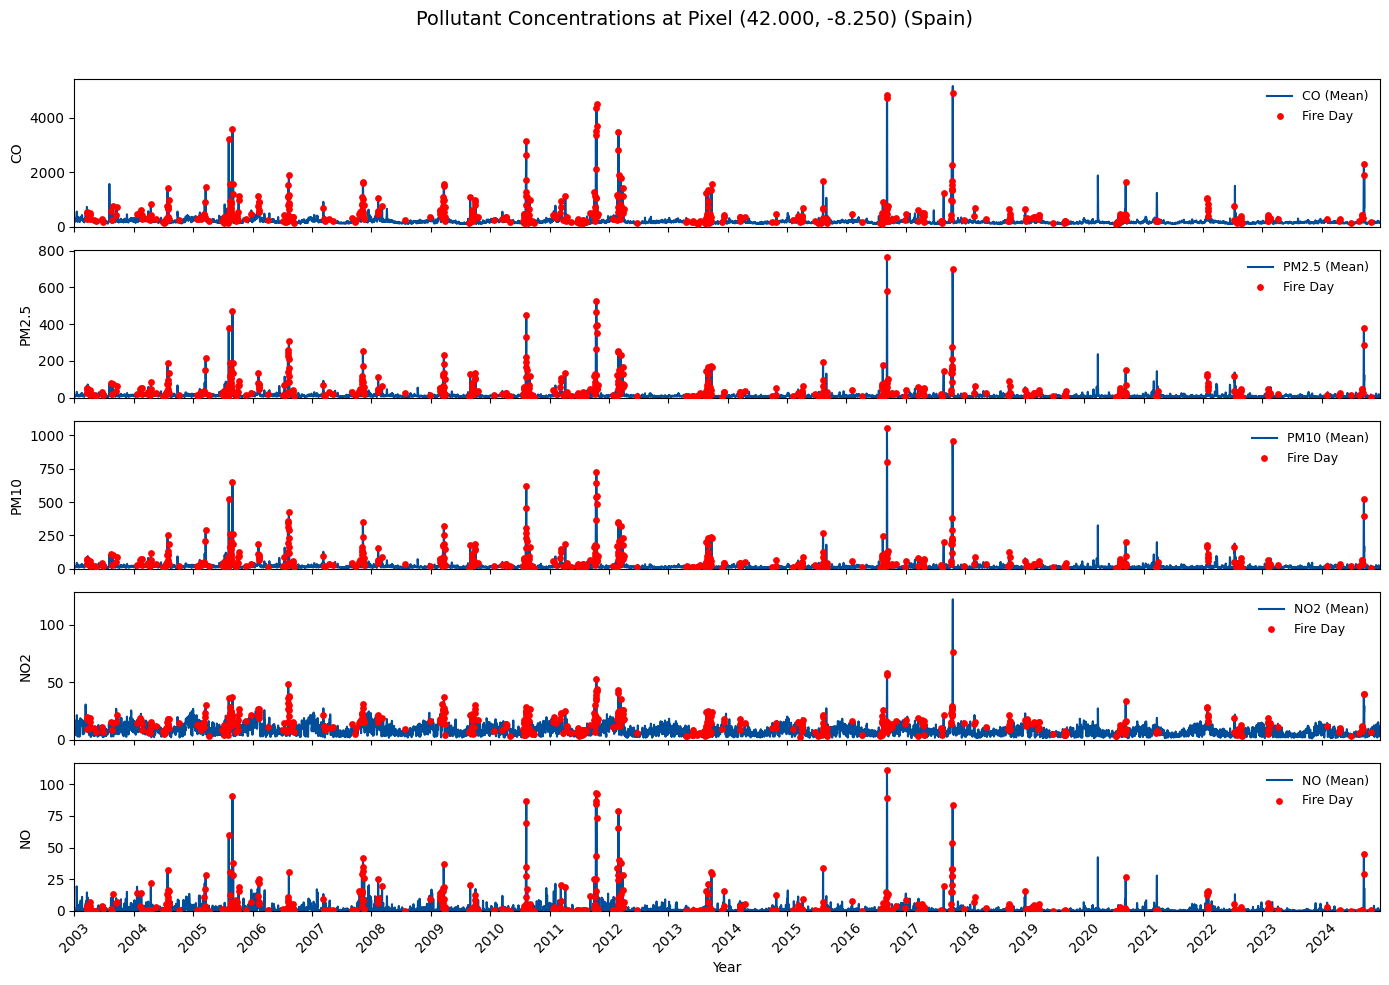

In [19]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Spain"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 42.00  # Example latitude
lon_val = -8.25  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Spain"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Spain)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Total grid pixels: 2795
Pixels with at least one fire: 122

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 42.000, Lon = -8.250, Fire Days = 503
2. Lat = 42.000, Lon = -7.500, Fire Days = 489
3. Lat = 42.000, Lon = -6.750, Fire Days = 391
4. Lat = 42.750, Lon = -6.750, Fire Days = 281
5. Lat = 42.750, Lon = -8.250, Fire Days = 166
6. Lat = 37.500, Lon = -5.250, Fire Days = 155
7. Lat = 42.750, Lon = -6.000, Fire Days = 145

Latitude range:
  min: 34.5000, max: 45.0000
Longitude range:
  min: -10.5000, max: 6.0000
Latitude indices: 0 to 14
Longitude indices: 2 to 24


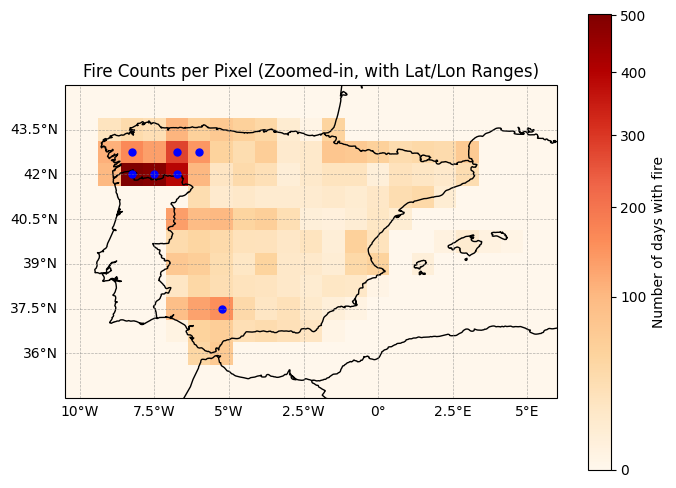

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Spain.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Spain"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"\nTotal grid pixels: {total_pixels}")
print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Lat/Lon Ranges)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


IBERIA

In [2]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Iberia.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Iberia.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Iberia.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Iberia.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Iberia.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Iberia"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  91.644255  172.721074  230.353731  352.407882  11041.778089
1     PM2.5   1.506768   10.854776   18.575608   35.461472    874.441990
2      PM10   2.293276   15.522269   26.027625   49.380607   1226.283407
3       NO2   0.285172    5.844093    9.002622   13.447092    121.688814
4        NO   0.032021    0.262875    0.685438    3.020321    243.436697

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut         max
0        CO  96.143208  145.163171  168.558353  199.920833  433.785352
1     PM2.5   2.216590    7.085987    9.239886   12.303525   73.117291
2      PM10   3.396091   10.509864   13.539639   17.703008   93.302002
3       NO2   1.752337    4.538262    5.950667    8.082193   20.142690
4        NO   0.052868    0.255497    0.488057    1.106534   10.411152

Fire days counts & percentages:
   quartile  count pollutant  percentage
0 

Selected pixel with most fire days at latitude=42.000, longitude=-8.250


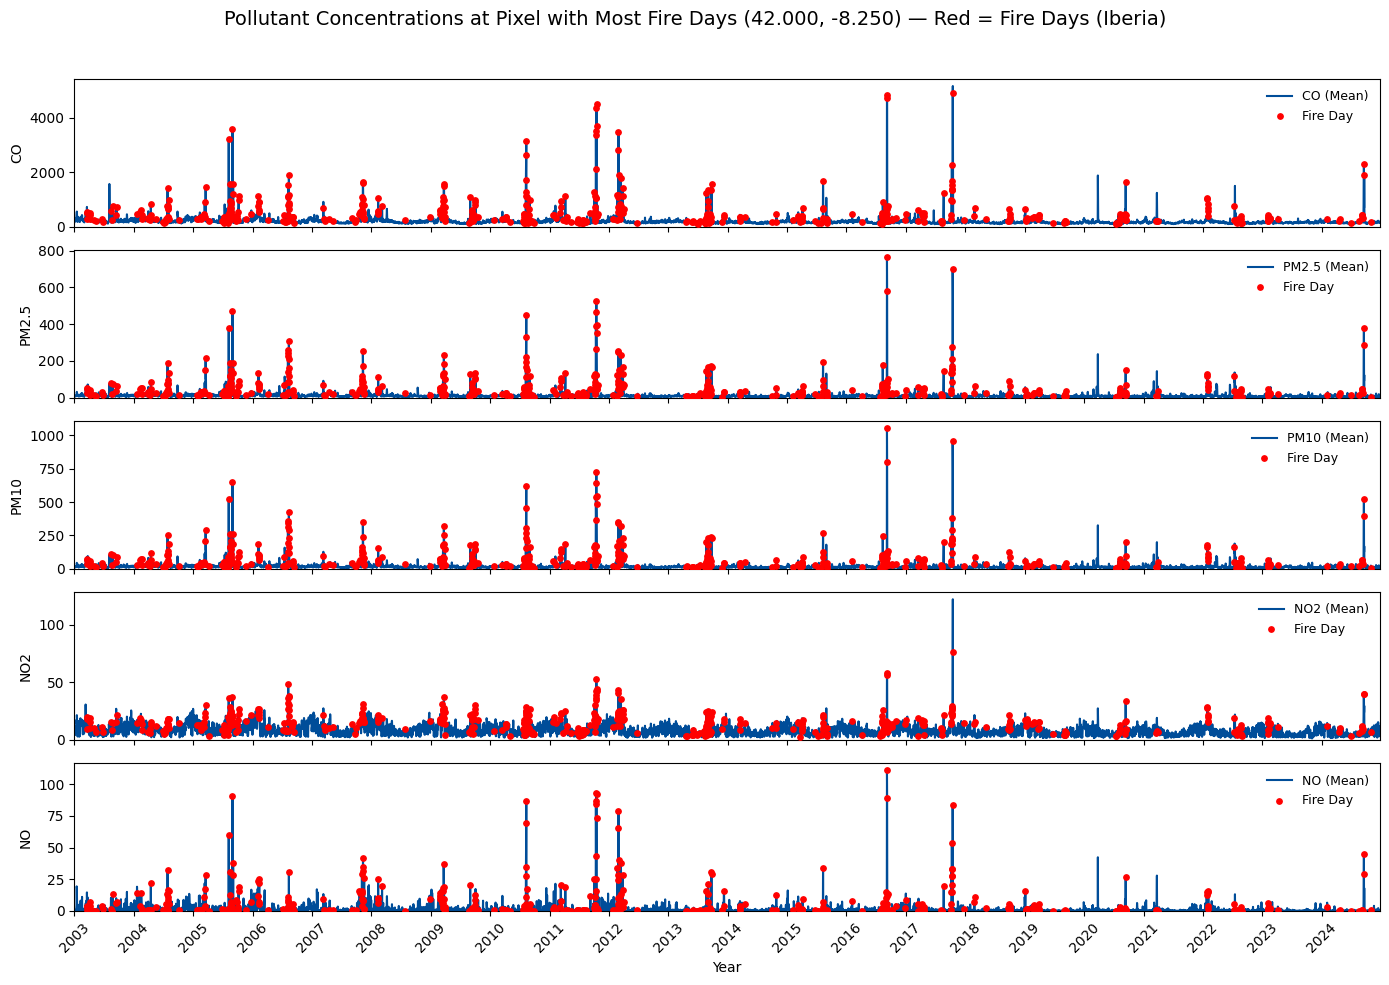

In [3]:
#Plots the pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Iberia.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Iberia.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Iberia.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Iberia.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Iberia.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Iberia"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Iberia"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Iberia)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=-7.500


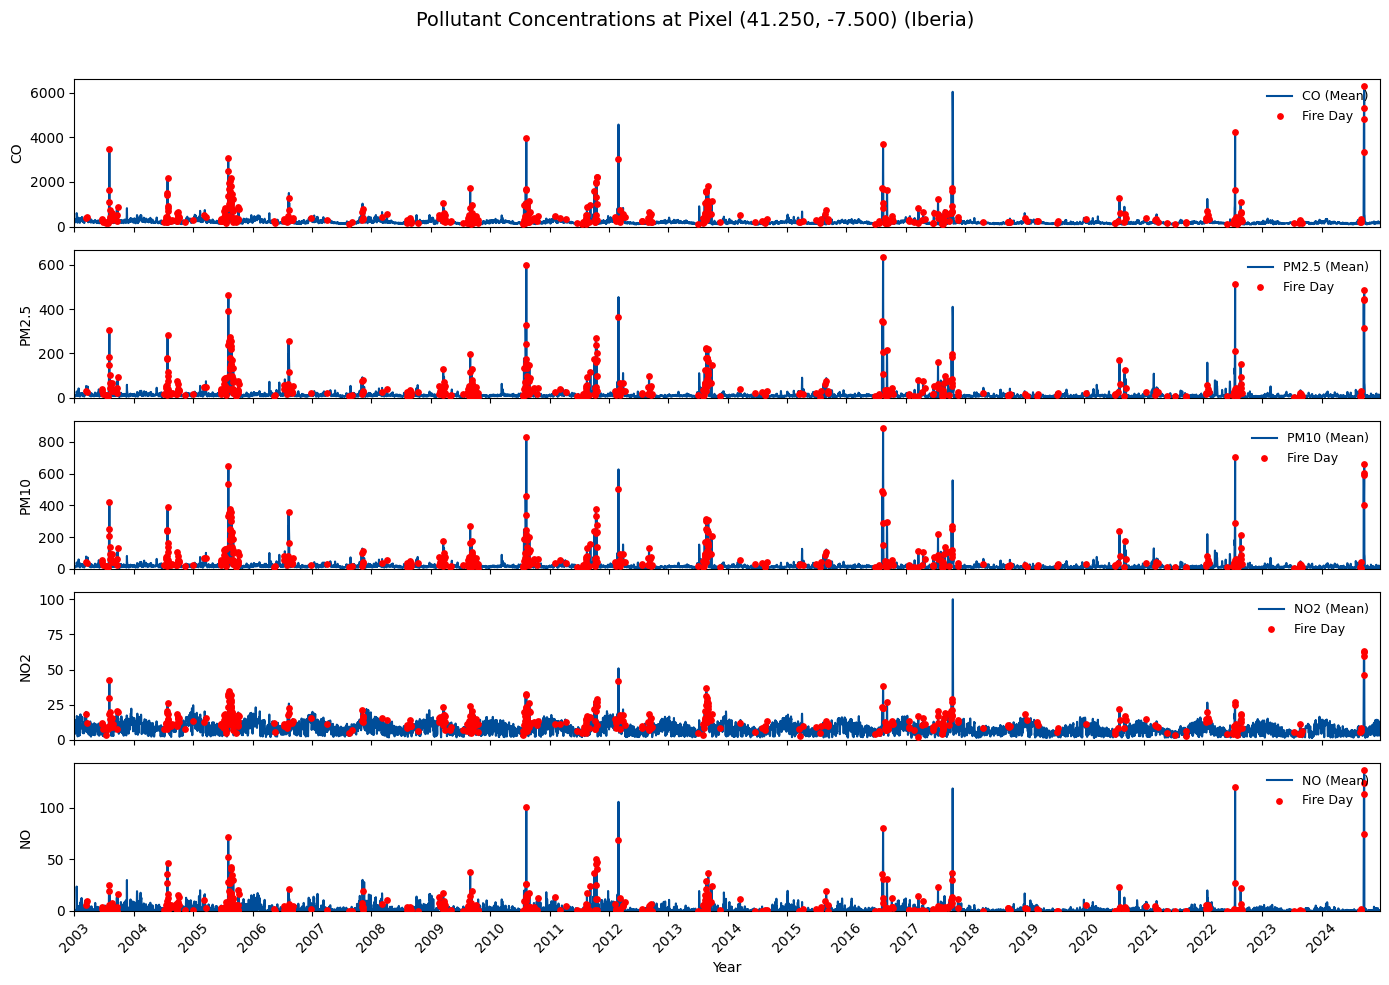

In [4]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Iberia.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Iberia.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Iberia.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Iberia.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Iberia.nc"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Iberia"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25   # Example latitude
lon_val = -7.50  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Iberia"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Iberia)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Total grid pixels: 2795
Pixels with at least one fire: 145

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 42.000, Lon = -8.250, Fire Days = 503
2. Lat = 41.250, Lon = -8.250, Fire Days = 490
3. Lat = 42.000, Lon = -7.500, Fire Days = 489
4. Lat = 41.250, Lon = -7.500, Fire Days = 433
5. Lat = 42.000, Lon = -6.750, Fire Days = 391
6. Lat = 40.500, Lon = -7.500, Fire Days = 390
7. Lat = 42.750, Lon = -6.750, Fire Days = 281

Latitude range:
  min: 34.5000, max: 45.0000
Longitude range:
  min: -11.2500, max: 6.0000
Latitude indices: 0 to 14
Longitude indices: 1 to 24


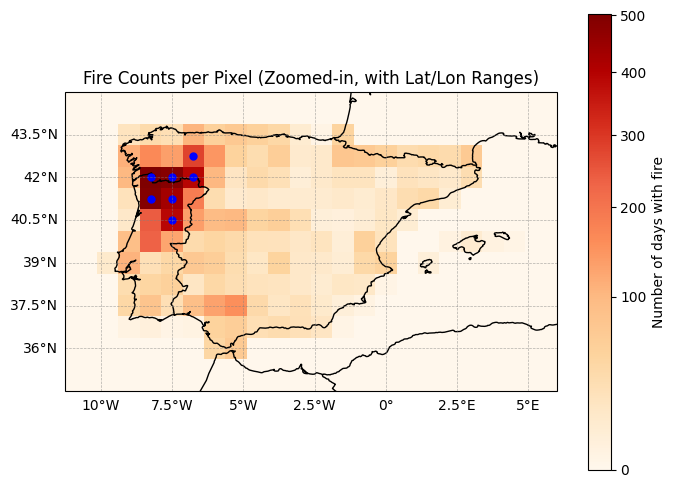

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Iberia.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Iberia"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"\nTotal grid pixels: {total_pixels}")
print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Lat/Lon Ranges)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Pearson correlation performed between meteorological variables and air pollutants, for all days and every label established

Understanding the p-values

Null hypothesis (H₀): There is no correlation between the variables.

Alternative hypothesis (H₁): There is a correlation.

p-value: Probability of observing the correlation (or more extreme) if H₀ is true.

Interpretation rule of thumb:

p < 0.05 → significant: reject the null → correlation is likely real.

p ≥ 0.05 → not significant: cannot reject the null → correlation might be due to chance.

..................................

How to read weak vs strong correlations

|r| < 0.1 → negligible

0.1 ≤ |r| < 0.3 → weak

0.3 ≤ |r| < 0.5 → moderate

|r| ≥ 0.5 → strong

CONVERT UNITS FOR CO

Wind speed

In [6]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks (same as before)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Wind_Speed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Wind_Speed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Wind_Speed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r    Pearson_p  Spearman_r    Spearman_p
      All        CO   0.040274 3.063104e-04    0.284337 3.413472e-149
      All     PM2.5  -0.064434 7.513922e-09    0.013770  2.172901e-01
      All      PM10  -0.050537 5.876464e-06    0.045059  5.363059e-05
      All       NO2   0.046844 2.677177e-05    0.088214  2.392802e-15
      All        NO   0.005107 6.472820e-01    0.049481  9.164956e-06
        0        CO   0.040274 3.063104e-04    0.284337 3.413472e-149
        0     PM2.5  -0.064434 7.513922e-09    0.013770  2.172901e-01
        0      PM10  -0.050537 5.876464e-06    0.045059  5.363059e-05
        0       NO2   0.046844 2.677177e-05    0.088214  2.392802e-15
        0        NO   0.005107 6.472820e-01    0.049481  9.164956e-06
        1        CO  -0.006053 8.325949e-01    0.176872  4.792792e-10
        1     PM2.5  -0.085175 2.884115e-03   -0.023221  4.173510e-01
        1      PM10  -0.084767 3.021792e-03   -0.018812 

In [7]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1222, After drop NaN = 1222
Fire Label 2: Before drop NaN = 349, After drop NaN = 349
Fire Label 3: Before drop NaN = 182, After drop NaN = 182
Fire Label 4: Before drop NaN = 94, After drop NaN = 94
Fire Label 5: Before drop NaN = 68, After drop NaN = 68
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [8]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO   0.350792 3.127376e-231    0.389153 1.232085e-288
      All     PM2.5   0.000863  9.383991e-01    0.000619  9.557953e-01
      All      PM10   0.029148  8.997943e-03    0.037120  8.779236e-04
      All       NO2   0.338939 4.862189e-215    0.357141 3.385701e-240
      All        NO   0.343592 2.593977e-221    0.403636  0.000000e+00
        0        CO   0.350792 3.127376e-231    0.389153 1.232085e-288
        0     PM2.5   0.000863  9.383991e-01    0.000619  9.557953e-01
        0      PM10   0.029148  8.997943e-03    0.037120  8.779236e-04
        0       NO2   0.338939 4.862189e-215    0.357141 3.385701e-240
        0        NO   0.343592 2.593977e-221    0.403636  0.000000e+00
        1        CO   0.238067  4.886465e-28    0.122868  2.078839e-08
        1     PM2.5  -0.036839  9.397212e-02   -0.055924  1.097175e-02
        1      PM10  -0.011594  5.982232e-0

In [9]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2068, After drop NaN = 2068
Fire Label 2: Before drop NaN = 478, After drop NaN = 478
Fire Label 3: Before drop NaN = 159, After drop NaN = 159
Fire Label 4: Before drop NaN = 64, After drop NaN = 64
Fire Label 5: Before drop NaN = 27, After drop NaN = 27
Fire Label 6: Before drop NaN = 11, After drop NaN = 11


In [10]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO   0.321636 1.191964e-192    0.381664 8.279406e-277
      All     PM2.5  -0.127059  2.949038e-30   -0.156410  3.763903e-45
      All      PM10  -0.097674  1.751726e-18   -0.106970  7.135282e-22
      All       NO2   0.299341 6.627332e-166    0.300747 1.596946e-167
      All        NO   0.241220 1.148820e-106    0.223485  1.911727e-91
        0        CO   0.321636 1.191964e-192    0.381664 8.279406e-277
        0     PM2.5  -0.127059  2.949038e-30   -0.156410  3.763903e-45
        0      PM10  -0.097674  1.751726e-18   -0.106970  7.135282e-22
        0       NO2   0.299341 6.627332e-166    0.300747 1.596946e-167
        0        NO   0.241220 1.148820e-106    0.223485  1.911727e-91
        1        CO   0.350165  9.322772e-77    0.415135 3.902873e-110
        1     PM2.5  -0.065945  7.128014e-04   -0.058031  2.904097e-03
        1      PM10  -0.045072  2.077812e-0

In [11]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2631, After drop NaN = 2631
Fire Label 2: Before drop NaN = 629, After drop NaN = 629
Fire Label 3: Before drop NaN = 248, After drop NaN = 248
Fire Label 4: Before drop NaN = 131, After drop NaN = 131
Fire Label 5: Before drop NaN = 74, After drop NaN = 74
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [12]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO   0.189255  1.220989e-65    0.259657 7.101020e-124
      All     PM2.5   0.000559  9.600549e-01   -0.067830  1.169869e-09
      All      PM10   0.012502  2.626310e-01   -0.047466  2.088996e-05
      All       NO2   0.297942 2.650235e-164    0.334637 2.453691e-209
      All        NO   0.228126  2.649136e-95    0.341625 1.201171e-218
        0        CO   0.189255  1.220989e-65    0.259657 7.101020e-124
        0     PM2.5   0.000559  9.600549e-01   -0.067830  1.169869e-09
        0      PM10   0.012502  2.626310e-01   -0.047466  2.088996e-05
        0       NO2   0.297942 2.650235e-164    0.334637 2.453691e-209
        0        NO   0.228126  2.649136e-95    0.341625 1.201171e-218
        1        CO   0.078694  7.263023e-04    0.111838  1.505929e-06
        1     PM2.5  -0.072513  1.850133e-03   -0.134669  6.601325e-09
        1      PM10  -0.065423  4.981680e-0

In [13]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1841, After drop NaN = 1841
Fire Label 2: Before drop NaN = 356, After drop NaN = 356
Fire Label 3: Before drop NaN = 117, After drop NaN = 117
Fire Label 4: Before drop NaN = 53, After drop NaN = 53
Fire Label 5: Before drop NaN = 29, After drop NaN = 29
Fire Label 6: Before drop NaN = 13, After drop NaN = 13


Total Precipitation

In [14]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r    Pearson_p  Spearman_r   Spearman_p
      All        CO  -0.080856 3.978703e-13   -0.123415 1.254675e-28
      All     PM2.5  -0.128627 5.671887e-31   -0.213600 1.627879e-83
      All      PM10  -0.108481 1.875771e-22   -0.166681 4.059157e-51
      All       NO2  -0.124785 3.103871e-29   -0.126851 3.663831e-30
      All        NO  -0.052354 2.679678e-06   -0.155647 1.007307e-44
        0        CO  -0.080856 3.978703e-13   -0.123415 1.254675e-28
        0     PM2.5  -0.128627 5.671887e-31   -0.213600 1.627879e-83
        0      PM10  -0.108481 1.875771e-22   -0.166681 4.059157e-51
        0       NO2  -0.124785 3.103871e-29   -0.126851 3.663831e-30
        0        NO  -0.052354 2.679678e-06   -0.155647 1.007307e-44
        1        CO  -0.072727 1.098809e-02   -0.164147 7.860692e-09
        1     PM2.5  -0.098162 5.898135e-04   -0.209842 1.257060e-13
        1      PM10  -0.094035 9.978426e-04   -0.196404 4.320808e-12


In [15]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1222, After drop NaN = 1222
Fire Label 2: Before drop NaN = 349, After drop NaN = 349
Fire Label 3: Before drop NaN = 182, After drop NaN = 182
Fire Label 4: Before drop NaN = 94, After drop NaN = 94
Fire Label 5: Before drop NaN = 68, After drop NaN = 68
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [16]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels


# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r    Pearson_p  Spearman_r   Spearman_p
      All        CO   0.001178 9.159352e-01    0.012506 2.624771e-01
      All     PM2.5  -0.124898 2.762646e-29   -0.148429 8.719363e-41
      All      PM10  -0.107378 4.982729e-22   -0.123084 1.754020e-28
      All       NO2   0.058924 1.263916e-07    0.071704 1.253357e-10
      All        NO   0.099099 5.542597e-19    0.099948 2.770674e-19
        0        CO   0.001178 9.159352e-01    0.012506 2.624771e-01
        0     PM2.5  -0.124898 2.762646e-29   -0.148429 8.719363e-41
        0      PM10  -0.107378 4.982729e-22   -0.123084 1.754020e-28
        0       NO2   0.058924 1.263916e-07    0.071704 1.253357e-10
        0        NO   0.099099 5.542597e-19    0.099948 2.770674e-19
        1        CO  -0.129215 3.695982e-09   -0.162054 1.225140e-13
        1     PM2.5  -0.124644 1.292864e-08   -0.134636 7.901276e-10
        1      PM10  -0.112415 2.970857e-07   -0.115257 1.474497e-07


In [17]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2068, After drop NaN = 2068
Fire Label 2: Before drop NaN = 478, After drop NaN = 478
Fire Label 3: Before drop NaN = 159, After drop NaN = 159
Fire Label 4: Before drop NaN = 64, After drop NaN = 64
Fire Label 5: Before drop NaN = 27, After drop NaN = 27
Fire Label 6: Before drop NaN = 11, After drop NaN = 11


In [18]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO  -0.096904  3.240089e-18   -0.074135  2.903444e-11
      All     PM2.5  -0.316365 4.081605e-186   -0.372343 1.627051e-262
      All      PM10  -0.293407 3.570222e-159   -0.332121 4.817786e-206
      All       NO2  -0.006673  5.499088e-01   -0.012772  2.524801e-01
      All        NO  -0.002875  7.967329e-01   -0.045981  3.757368e-05
        0        CO  -0.096904  3.240089e-18   -0.074135  2.903444e-11
        0     PM2.5  -0.316365 4.081605e-186   -0.372343 1.627051e-262
        0      PM10  -0.293407 3.570222e-159   -0.332121 4.817786e-206
        0       NO2  -0.006673  5.499088e-01   -0.012772  2.524801e-01
        0        NO  -0.002875  7.967329e-01   -0.045981  3.757368e-05
        1        CO  -0.106059  4.955679e-08   -0.115159  3.146442e-09
        1     PM2.5  -0.282739  1.493703e-49   -0.328076  4.607296e-67
        1      PM10  -0.267633  2.154434e-4

In [19]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2631, After drop NaN = 2631
Fire Label 2: Before drop NaN = 629, After drop NaN = 629
Fire Label 3: Before drop NaN = 248, After drop NaN = 248
Fire Label 4: Before drop NaN = 131, After drop NaN = 131
Fire Label 5: Before drop NaN = 74, After drop NaN = 74
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [20]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r    Pearson_p  Spearman_r   Spearman_p
      All        CO  -0.047113 2.405565e-05   -0.036224 1.167836e-03
      All     PM2.5   0.006611 5.536248e-01   -0.075514 1.240206e-11
      All      PM10   0.010006 3.699717e-01   -0.068482 8.099972e-10
      All       NO2   0.147593 2.421278e-40    0.179354 4.963749e-59
      All        NO   0.092839 7.679263e-17    0.157470 9.513827e-46
        0        CO  -0.047113 2.405565e-05   -0.036224 1.167836e-03
        0     PM2.5   0.006611 5.536248e-01   -0.075514 1.240206e-11
        0      PM10   0.010006 3.699717e-01   -0.068482 8.099972e-10
        0       NO2   0.147593 2.421278e-40    0.179354 4.963749e-59
        0        NO   0.092839 7.679263e-17    0.157470 9.513827e-46
        1        CO  -0.037080 1.117287e-01   -0.029923 1.993839e-01
        1     PM2.5  -0.019641 3.996605e-01   -0.061112 8.721618e-03
        1      PM10  -0.020536 3.785128e-01   -0.061624 8.173293e-03


In [21]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1841, After drop NaN = 1841
Fire Label 2: Before drop NaN = 356, After drop NaN = 356
Fire Label 3: Before drop NaN = 117, After drop NaN = 117
Fire Label 4: Before drop NaN = 53, After drop NaN = 53
Fire Label 5: Before drop NaN = 29, After drop NaN = 29
Fire Label 6: Before drop NaN = 13, After drop NaN = 13


Temperature

In [22]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks (same as precipitation script)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r    Pearson_p  Spearman_r   Spearman_p
      All        CO  -0.064609 6.840966e-09   -0.460009 0.000000e+00
      All     PM2.5   0.103006 2.170250e-20   -0.056680 3.726299e-07
      All      PM10   0.092196 1.252478e-16   -0.080561 4.840269e-13
      All       NO2  -0.175581 1.303138e-56   -0.229125 3.811742e-96
      All        NO  -0.012773 2.524199e-01   -0.162151 1.946281e-48
        0        CO  -0.064609 6.840966e-09   -0.460009 0.000000e+00
        0     PM2.5   0.103006 2.170250e-20   -0.056680 3.726299e-07
        0      PM10   0.092196 1.252478e-16   -0.080561 4.840269e-13
        0       NO2  -0.175581 1.303138e-56   -0.229125 3.811742e-96
        0        NO  -0.012773 2.524199e-01   -0.162151 1.946281e-48
        1        CO   0.014063 6.233357e-01   -0.270344 6.552122e-22
        1     PM2.5   0.132983 3.091132e-06    0.006849 8.109620e-01
        1      PM10   0.135678 1.935052e-06    0.013643 6.337614e-01


In [23]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1222, After drop NaN = 1222
Fire Label 2: Before drop NaN = 349, After drop NaN = 349
Fire Label 3: Before drop NaN = 182, After drop NaN = 182
Fire Label 4: Before drop NaN = 94, After drop NaN = 94
Fire Label 5: Before drop NaN = 68, After drop NaN = 68
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [24]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r   Spearman_p
      All        CO  -0.638874  0.000000e+00   -0.672702 0.000000e+00
      All     PM2.5  -0.159501  6.630253e-47   -0.164451 8.654920e-50
      All      PM10  -0.191142  6.075939e-67   -0.204081 3.006756e-76
      All       NO2  -0.593044  0.000000e+00   -0.603595 0.000000e+00
      All        NO  -0.529623  0.000000e+00   -0.629876 0.000000e+00
        0        CO  -0.638874  0.000000e+00   -0.672702 0.000000e+00
        0     PM2.5  -0.159501  6.630253e-47   -0.164451 8.654920e-50
        0      PM10  -0.191142  6.075939e-67   -0.204081 3.006756e-76
        0       NO2  -0.593044  0.000000e+00   -0.603595 0.000000e+00
        0        NO  -0.529623  0.000000e+00   -0.629876 0.000000e+00
        1        CO  -0.528455 4.011418e-149   -0.233258 5.946854e-27
        1     PM2.5  -0.102744  2.842629e-06   -0.008296 7.061355e-01
        1      PM10  -0.134772  7.593937e-10   -0.036943

In [25]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2068, After drop NaN = 2068
Fire Label 2: Before drop NaN = 478, After drop NaN = 478
Fire Label 3: Before drop NaN = 159, After drop NaN = 159
Fire Label 4: Before drop NaN = 64, After drop NaN = 64
Fire Label 5: Before drop NaN = 27, After drop NaN = 27
Fire Label 6: Before drop NaN = 11, After drop NaN = 11


In [26]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO  -0.588778  0.000000e+00   -0.653826  0.000000e+00
      All     PM2.5   0.032747  3.337946e-03    0.040472  2.860163e-04
      All      PM10   0.004200  7.067037e-01   -0.008177  4.637620e-01
      All       NO2  -0.528642  0.000000e+00   -0.524292  0.000000e+00
      All        NO  -0.388459 1.583743e-287   -0.427173  0.000000e+00
        0        CO  -0.588778  0.000000e+00   -0.653826  0.000000e+00
        0     PM2.5   0.032747  3.337946e-03    0.040472  2.860163e-04
        0      PM10   0.004200  7.067037e-01   -0.008177  4.637620e-01
        0       NO2  -0.528642  0.000000e+00   -0.524292  0.000000e+00
        0        NO  -0.388459 1.583743e-287   -0.427173  0.000000e+00
        1        CO  -0.594274 5.114991e-251   -0.617317 3.192696e-276
        1     PM2.5  -0.044414  2.271621e-02   -0.052774  6.777930e-03
        1      PM10  -0.065497  7.750537e-0

In [27]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 2631, After drop NaN = 2631
Fire Label 2: Before drop NaN = 629, After drop NaN = 629
Fire Label 3: Before drop NaN = 248, After drop NaN = 248
Fire Label 4: Before drop NaN = 131, After drop NaN = 131
Fire Label 5: Before drop NaN = 74, After drop NaN = 74
Fire Label 6: Before drop NaN = 43, After drop NaN = 43


In [28]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


Correlation results saved to CSV.
FireLabel Pollutant  Pearson_r     Pearson_p  Spearman_r    Spearman_p
      All        CO  -0.364348 1.257872e-250   -0.499604  0.000000e+00
      All     PM2.5  -0.031016  5.442529e-03    0.036390  1.108307e-03
      All      PM10  -0.042661  1.312981e-04    0.012885  2.482875e-01
      All       NO2  -0.462941  0.000000e+00   -0.514107  0.000000e+00
      All        NO  -0.327509 4.358484e-200   -0.509035  0.000000e+00
        0        CO  -0.364348 1.257872e-250   -0.499604  0.000000e+00
        0     PM2.5  -0.031016  5.442529e-03    0.036390  1.108307e-03
        0      PM10  -0.042661  1.312981e-04    0.012885  2.482875e-01
        0       NO2  -0.462941  0.000000e+00   -0.514107  0.000000e+00
        0        NO  -0.327509 4.358484e-200   -0.509035  0.000000e+00
        1        CO  -0.154989  2.293500e-11   -0.218373  2.593306e-21
        1     PM2.5   0.111066  1.779068e-06    0.182456  3.031001e-15
        1      PM10   0.102449  1.060819e-0

In [29]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


No invalid dates found.

Number of days per fire label:
Fire Label 0: Before drop NaN = 8030, After drop NaN = 8030
Fire Label 1: Before drop NaN = 1841, After drop NaN = 1841
Fire Label 2: Before drop NaN = 356, After drop NaN = 356
Fire Label 3: Before drop NaN = 117, After drop NaN = 117
Fire Label 4: Before drop NaN = 53, After drop NaN = 53
Fire Label 5: Before drop NaN = 29, After drop NaN = 29
Fire Label 6: Before drop NaN = 13, After drop NaN = 13
